In [1]:
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
df1 = pd.read_csv('01_April_30_covid_impact_survey.csv')
df2 = pd.read_csv('02_May_12_covid_impact_survey.csv')
df3 = pd.read_csv('03_June_9_covid_impact_survey.csv')

/Users/jingyilu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (96,156,168,170) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jingyilu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (172) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


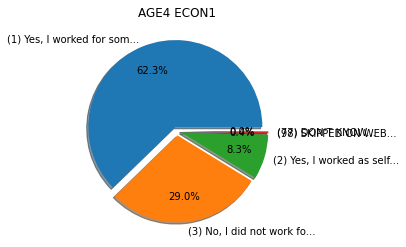

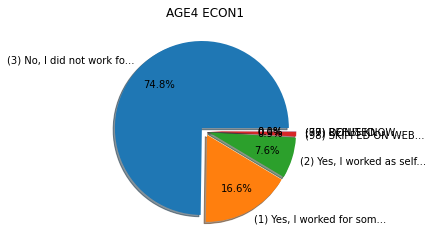

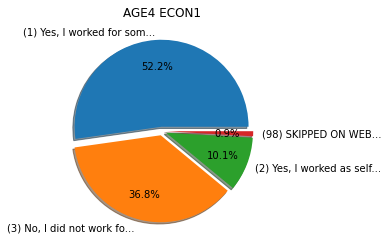

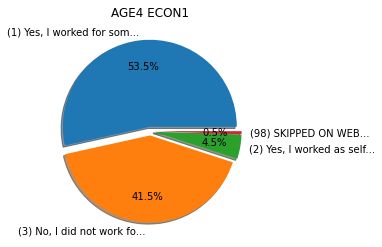

In [3]:
def draw_pie(data, col_1, col_2):
    # col_1 is the key, e.g. age, 
    labels = data[col_1].drop_duplicates().to_list()
    for label in labels:
        counts = data[col_2][data[col_1] == label].value_counts()
        y = list(map(lambda x: x[:25] + '...', counts.keys().to_list()))
        x = counts.to_list()
        explode = [0.05] * len(x)
        plot.pie(x, explode=explode, labels=y, shadow=True, autopct='%.1f%%', pctdistance=0.7)
        plot.title(col_1 + ' ' + col_2)
        plot.show()

draw_pie(df1, 'AGE4', 'ECON1')